In [1]:
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import matplotlib.colors as mcolors
from matplotlib import cm

import numpy as np

import pandas as pd

import os
import re
import sys

import seaborn as sns
 
from pytictoc import TicToc
t = TicToc()
    
from collections import defaultdict

from pathlib import Path
    
from sklearn.metrics import pairwise_distances
    
import ot  

import itertools

sys.path.append("/home/charles/Projects/BarycentersAgePyramid/Python")
sys.path.append("/home/dhw3172/projects/barycenterAgePyramid/Python")

from WassAge import *
 
import networkx as nx

import scipy
from scipy.ndimage.filters import gaussian_filter1d

/home/charles/anaconda3/envs/py37/lib/python3.7/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


# Params

In [2]:
viridis = cm.get_cmap("viridis")

In [3]:
FIG_PATH= Path(".") / ".." /".." /"Figures"
os.listdir( FIG_PATH )

['CityComparison',
 '.ipynb_checkpoints',
 'ByCity',
 'groundDistance.png',
 'Extremal',
 'ReferenceDistributions',
 'Example',
 'ByNeigh']

In [4]:
numPoints=300

# Data generation

In [5]:
x = np.linspace(-5, 15, numPoints)
y = scipy.stats.norm.pdf(x,1,1)

array([1.75634831e-06, 2.44296085e-06, 3.38282270e-06, 4.66335885e-06,
       6.39993120e-06, 8.74396971e-06, 1.18932036e-05, 1.61044513e-05,
       2.17095029e-05, 2.91347099e-05, 3.89249788e-05, 5.17729537e-05,
       6.85542477e-05, 9.03696636e-05, 1.18595397e-04, 1.54942253e-04,
       2.01524928e-04, 2.60942338e-04, 3.36369953e-04, 4.31664873e-04])

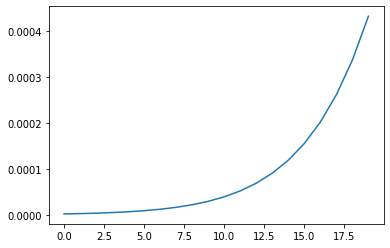

In [6]:
mu1=10
sigma1=1
gauss1 = scipy.stats.norm.pdf(x,mu1,sigma1)

plt.plot(gauss1[150:150+20])
gauss1[150:150+20] #the values are already sorted

In [7]:
mu2=1
sigma2=0.5
gauss2 = scipy.stats.norm.pdf(x,mu2,sigma2)

# Build the cdf

In [8]:
def cdf(x):
    return np.cumsum(x)

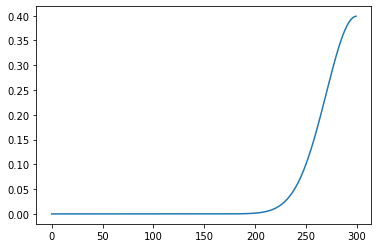

In [9]:
plt.plot( sorted(gauss1) )

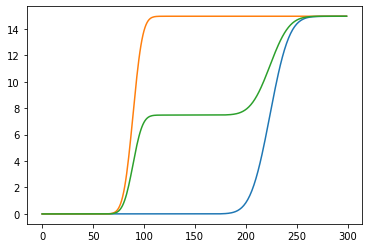

In [43]:
plt.plot( cdf( gauss1) )
plt.plot( cdf( gauss2) )

plt.plot( 0.5*(cdf( gauss1) +cdf( gauss2) ))

In [11]:
np.sum(gauss1)

14.949996416550725

# CDF inverse - quantile fct

In [66]:
def getWassQuantile( A ):

    numDist=A.shape[1]
    numAtoms=A.shape[0]
    wass=np.zeros(numAtoms,dtype="float64")
    
        
    for i in range(numAtoms):
        for c in range(numDist):
            aCDF=cdf(A[:,c]) #get the cdf <=> cumulative sum
            q=np.quantile(aCDF,i/numAtoms) #get the average quantile
            xIdx=np.argmax( q== range(0,numAtoms) )
            
            wass[i]=wass[i] + x[xIdx]
 
            
    return wass/numDist

In [67]:
def getWass(A):
    wassCumSum=getWassQuantile(A)
    

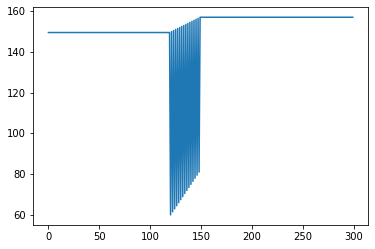

In [68]:
plt.plot( 0.5*( np.argsort(A[:,0]) + np.argsort(A[:,1]) ) )

In [69]:
A=np.column_stack([gauss1,gauss2])
print( A.shape )
A[:20,:]

(300, 2)


array([[5.53070955e-50, 4.29276747e-32],
       [1.50506847e-49, 2.11858678e-31],
       [4.07744897e-49, 1.02702882e-30],
       [1.09970875e-48, 4.89042366e-30],
       [2.95272973e-48, 2.28737734e-29],
       [7.89271792e-48, 1.05088846e-28],
       [2.10032420e-47, 4.74245165e-28],
       [5.56420295e-47, 2.10221281e-27],
       [1.46749441e-46, 9.15330479e-27],
       [3.85306930e-46, 3.91477358e-26],
       [1.00714976e-45, 1.64460972e-25],
       [2.62082582e-45, 6.78651063e-25],
       [6.78952093e-45, 2.75079163e-24],
       [1.75104366e-44, 1.09520731e-23],
       [4.49584869e-44, 4.28314179e-23],
       [1.14916733e-43, 1.64534149e-22],
       [2.92423130e-43, 6.20836332e-22],
       [7.40793295e-43, 2.30104800e-21],
       [1.86826825e-42, 8.37725455e-21],
       [4.69070688e-42, 2.99574763e-20]])

(300,)


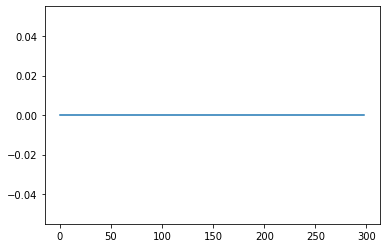

In [70]:
wass= getWassQuantile(A)
print( wass.shape )
plt.plot(wass[1:]-wass[:-1])

In [76]:
            c=0
            i=150
            numAtoms = 300
            aCDF=cdf(A[:,c]) #get the cdf <=> cumulative sum
            q=np.quantile(aCDF,i/numAtoms) #get the average quantile
            xIdx=np.argmax( q== range(0,numAtoms) )
            
            wass[i]=wass[i] + x[xIdx]
            
            xIdx, q

(0, 5.142956566560575e-06)

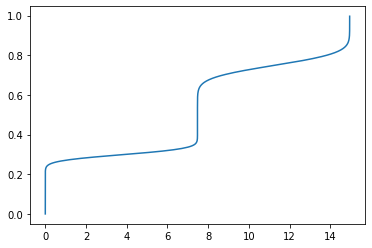

In [60]:
plt.plot( wass, np.arange(0,len(wass))/len(wass) )

In [ ]:
for c in range(2):
    plt.plot(A[:,c])
    
#plt.plot( wass)

In [ ]:
i=0
c=0
numAtoms=numPoints
np.quantile(np.arange(1,300),i/numAtoms)

In [ ]:
i=150
numAtoms=numPoints
            

In [ ]:
plt.plot(A[:,c])

In [ ]:
plt.plot(aCDF)

In [ ]:
plt.plot(np.cumsum(A[:,c]))

In [ ]:
i=299
aCDF=cdf(A[:,c]) #get the cdf 
q=np.quantile(aCDF,i/numAtoms) #get the average quantile
xIdx=np.argmax(aCDF >= q  )
wass[i]=wass[i] + x[xIdx]


q, i/numAtoms, xIdx, wass[i]

In [ ]:
xIdx

In [ ]:
aCDF[-20:]

In [ ]:
aCDF[xIdx]

In [ ]:
np.arange(1,300)[xIdx]